In [1]:
from utils import read_and_standardize_data
import classifier as cl

{'sensitivity': 0.85, 'specificity': 0.9222222222222223, 'precision': 0.5483870967741935}


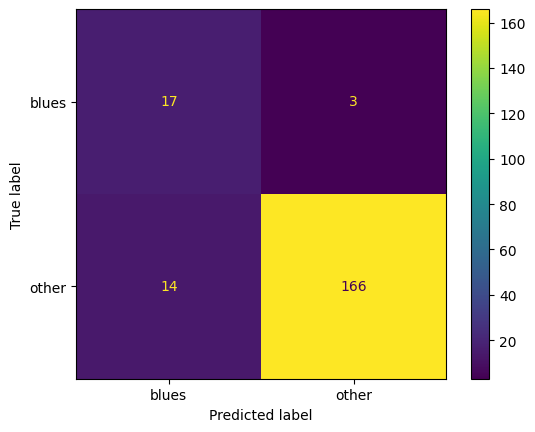

In [11]:
X_train, X_test, y_train, y_test = read_and_standardize_data(True, "blues")

model: cl.Classifier = cl.Classifier(X_train, y_train)

model.pre_process("LDA")

model.train("one_vs_all", target_class="blues", distance_type="euclidean")

model.predict(X_test, y_test)

model.get_statistics(y_test, True)